* https://github.com/fchollet/keras/blob/master/examples/imdb_lstm.py

In [1]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
vocabulary_size = 15000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocabulary_size)

In [3]:
maxlen = 80
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [4]:
model = Sequential()
model.add(Embedding(vocabulary_size, 128))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

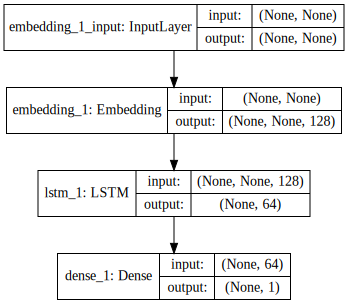

In [5]:
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=8,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/8
25000/25000 [==============================] - 66s - loss: 0.4564 - acc: 0.7864 - val_loss: 0.3689 - val_acc: 0.8323
Epoch 2/8
25000/25000 [==============================] - 63s - loss: 0.3023 - acc: 0.8754 - val_loss: 0.3948 - val_acc: 0.8256
Epoch 3/8
25000/25000 [==============================] - 68s - loss: 0.2303 - acc: 0.9099 - val_loss: 0.4206 - val_acc: 0.8339
Epoch 4/8
25000/25000 [==============================] - 66s - loss: 0.1733 - acc: 0.9318 - val_loss: 0.4517 - val_acc: 0.8327
Epoch 5/8
25000/25000 [==============================] - 64s - loss: 0.1282 - acc: 0.9525 - val_loss: 0.5009 - val_acc: 0.8264
Epoch 6/8
25000/25000 [==============================] - 65s - loss: 0.0940 - acc: 0.9651 - val_loss: 0.6640 - val_acc: 0.8196
Epoch 7/8
25000/25000 [==============================] - 66s - loss: 0.0724 - acc: 0.9745 - val_loss: 0.7094 - val_acc: 0.8218
Epoch 8/8
25000/25000 [==============================] - 65s 

In [7]:
score, acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 12s    
Test score: 0.690729214754
Test accuracy: 0.82004
